In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vaccination_type_df = pd.read_csv('/Users/aleksandrakieler/Desktop/archive/Global COVID-19 Data (2020-2024)/Global COVID-19 Data (2020-2024)/vaccination-metadata.csv', sep=';')

vaccination_type_df.head(5)

,ISO3,PRODUCT_NAME,VACCINE_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
0,SHN,AZD1222,AstraZeneca - AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
1,GRL,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
2,FRO,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
3,FRO,Comirnaty,Pfizer BioNTech - Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
4,JEY,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID


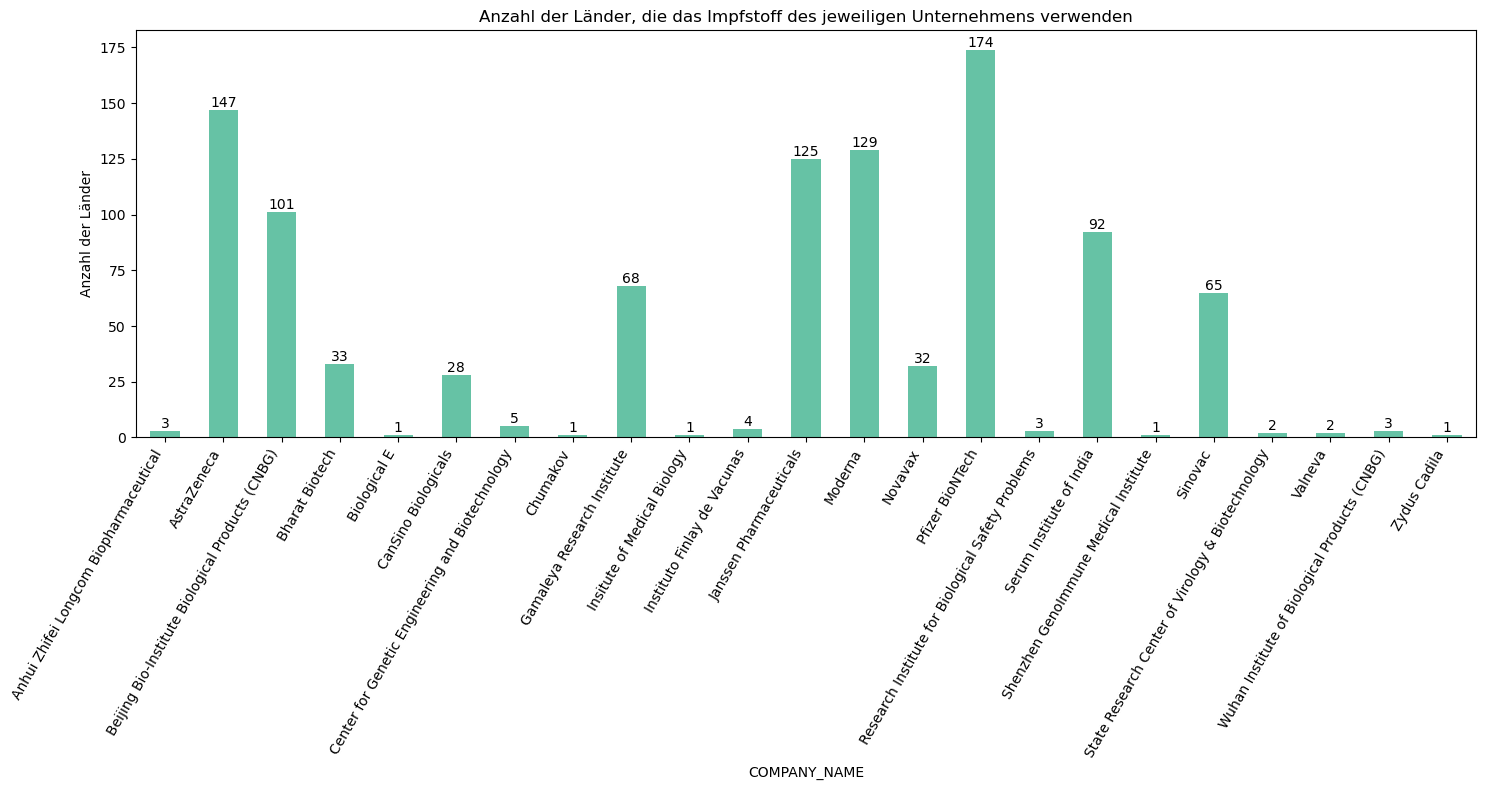


Anzahl der Länder, die den Impfstoff des jeweiligen Unternehmens verwenden
--------------------------------------------------
Anhui Zhifei Longcom Biopharmaceutical: 3 countries (1.3%)
AstraZeneca: 147 countries (65.3%)
Beijing Bio-Institute Biological Products (CNBG): 101 countries (44.9%)
Bharat Biotech: 33 countries (14.7%)
Biological E: 1 countries (0.4%)
CanSino Biologicals: 28 countries (12.4%)
Center for Genetic Engineering and Biotechnology: 5 countries (2.2%)
Chumakov: 1 countries (0.4%)
Gamaleya Research Institute: 68 countries (30.2%)
Insitute of Medical Biology: 1 countries (0.4%)
Instituto Finlay de Vacunas: 4 countries (1.8%)
Janssen Pharmaceuticals: 125 countries (55.6%)
Moderna: 129 countries (57.3%)
Novavax: 32 countries (14.2%)
Pfizer BioNTech: 174 countries (77.3%)
Research Institute for Biological Safety Problems: 3 countries (1.3%)
Serum Institute of India: 92 countries (40.9%)
Shenzhen GenoImmune Medical Institute: 1 countries (0.4%)
Sinovac: 65 countries (28.9%)

In [6]:
# Create a grouped bar chart
plt.figure(figsize=(15, 8))
company_country_counts = vaccination_type_df.groupby('COMPANY_NAME')['ISO3'].nunique()

company_country_counts.plot(kind='bar')
plt.title('Anzahl der Länder, die das Impfstoff des jeweiligen Unternehmens verwenden')
plt.xlabel('Unternehmen')
plt.ylabel('Anzahl der Länder')
bars = company_country_counts.plot(kind='bar', colormap='Set2')

# Rotate x-axis labels
plt.xticks(rotation=60, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(company_country_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Add a percentage analysis
total_countries = len(vaccination_type_df['ISO3'].unique())
print("\nAnzahl der Länder, die den Impfstoff des jeweiligen Unternehmens verwenden")
print("-" * 50)
for company, count in company_country_counts.items():
    percentage = (count / total_countries) * 100
    print(f"{company}: {count} countries ({percentage:.1f}%)")

In [4]:
# Detailliertere Analyse der Verteilung
# Zeigt die vollständige Verteilung von Impfstoffen pro Land
detailed_distribution = pd.crosstab(
    vaccination_type_df['ISO3'], 
    vaccination_type_df['COMPANY_NAME']
)

print("Detaillierte Verteilung der Impfstoffe nach Ländern:")
print(detailed_distribution)

# Analyse der Diversifikation
vaccine_diversity = vaccination_type_df.groupby('ISO3')['COMPANY_NAME'].nunique()
print("\nAnzahl verschiedener Hersteller pro Land:")
print(vaccine_diversity.sort_values(ascending=False))

Detaillierte Verteilung der Impfstoffe nach Ländern:
COMPANY_NAME  Anhui Zhifei Longcom Biopharmaceutical  AstraZeneca  \
ISO3                                                                
ABW                                                0            0   
AFG                                                0            1   
AGO                                                0            0   
AIA                                                0            1   
ALB                                                0            1   
...                                              ...          ...   
XKX                                                0            1   
YEM                                                0            1   
ZAF                                                0            0   
ZMB                                                0            0   
ZWE                                                0            0   

COMPANY_NAME  Beijing Bio-Institute Biological Pr